In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy import stats
%matplotlib inline


In [2]:
#  loading the data into a dataframe
video_df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", encoding = 'utf-8')
video_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
video_df["Year_of_Release"] = video_df["Year_of_Release"].fillna(0).astype(np.int64)
video_df["Year_of_Release"].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: Year_of_Release, dtype: int64

In [4]:
video_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,1974.204019,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,252.530614,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
video_df.groupby("Platform").count()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Platform,,,,,,,,,,,,,,,
2600,133,133,133,133,133,133,133,133,133,0,0,0,0,0,0
3DO,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0
3DS,520,520,520,519,520,520,520,520,520,168,168,230,174,234,228
DC,52,52,52,52,52,52,52,52,52,14,14,14,14,14,14
DS,2152,2152,2152,2147,2152,2152,2152,2152,2152,717,717,1273,516,1279,1274
GB,98,98,98,98,98,98,98,98,98,0,0,0,0,0,0
GBA,822,822,822,796,822,822,822,822,822,438,438,517,255,522,522
GC,556,556,556,556,556,556,556,556,556,448,448,469,366,469,469
GEN,27,29,27,29,29,29,29,29,29,0,0,0,0,0,0


In [6]:
#I am removing the gaming platforms that have less than 10 games which throws off the mean in further analysis

video_df_clean = video_df[(video_df["Platform"] != "DC") & \
                          (video_df["Platform"] != "TG16") & \
                          (video_df["Platform"] != "PCFX") & \
                          (video_df["Platform"] != "3DO") & \
                          (video_df["Platform"] != "GG") & \
                          (video_df["Platform"] != "WS") & \
                          (video_df["Platform"] != "SCD")]

video_df_clean.groupby("Platform").count()

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Platform,,,,,,,,,,,,,,,
2600,133,133,133,133,133,133,133,133,133,0,0,0,0,0,0
3DS,520,520,520,519,520,520,520,520,520,168,168,230,174,234,228
DS,2152,2152,2152,2147,2152,2152,2152,2152,2152,717,717,1273,516,1279,1274
GB,98,98,98,98,98,98,98,98,98,0,0,0,0,0,0
GBA,822,822,822,796,822,822,822,822,822,438,438,517,255,522,522
GC,556,556,556,556,556,556,556,556,556,448,448,469,366,469,469
GEN,27,29,27,29,29,29,29,29,29,0,0,0,0,0,0
N64,319,319,319,319,319,319,319,319,319,0,0,0,0,0,0
NES,98,98,98,98,98,98,98,98,98,0,0,0,0,0,0


In [7]:
#  User scores are rated out of a possible score of 10.  
#  We need to convert these to out of 100 since this is how Metacritic rates their games
video_df_clean["User_Score"] = video_df_clean["User_Score"].convert_objects(convert_numeric=True)
video_df_clean["User_Score"] = (video_df_clean["User_Score"] * 10)

/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

# #1 What is the most/least critically acclaimed game devoloper?


In [8]:
video_df["Developer"].nunique()

1696

### Developer by Critic_Score

In [9]:
developer_df_critic = video_df_clean.groupby("Developer", as_index=False)["Critic_Score"] \
                                    .agg('mean') \
                                    .dropna() \
                                    .sort_values(by=['Critic_Score'], ascending=False)


In [10]:
developer_df_user = video_df_clean.groupby("Developer", as_index=False)["User_Score"] \
                                .agg('mean') \
                                .dropna() \
                                .sort_values(by=['User_Score'], ascending=False)


In [11]:
df_merge_critic = developer_df_critic.merge(developer_df_user, on="Developer")
df_merge_critic.head(15)


,Developer,Critic_Score,User_Score
0,"Irrational Games, 2K Marin",96.000000,87.000000
1,"Digital Extremes, 2K Marin",94.000000,87.000000
2,"Kojima Productions, Moby Dick Studio",94.000000,74.750000
3,Bungie Software,93.666667,80.666667
4,"DMA Design, Rockstar North",93.000000,84.000000
5,Rockstar North,92.857143,82.857143
6,ThatGameCompany,92.000000,88.000000
7,Irrational Games,91.500000,85.250000
8,Valve Software,91.384615,87.307692
9,Psygnosis,91.000000,83.333333


In [12]:
df_merge_user = developer_df_user.merge(developer_df_critic, on="Developer")
df_merge_user.head(15)

,Developer,User_Score,Critic_Score
0,"Infinite Dreams, Paragon 5",95.0,81.000000
1,Inferno Games,95.0,78.000000
2,"Tecmo, Graphic Research",94.0,79.000000
3,Pax Softonica,93.0,72.000000
4,Telenet,93.0,72.000000
5,Handheld Games,92.5,57.000000
6,Activision Value,92.0,53.333333
7,Housemarque,92.0,74.000000
8,Rockstar Vancouver,91.0,87.000000
9,Quest,91.0,88.000000


When sorting the average rating for developer's based off the critic score, we see that the top 5 are Irrational Games, 2K Marin with a score of 96.0; Digital Extremes, 2K Marin with a score of 94.0; Kojima Productions, Moby Dick Studio with a score of 94.0; Bungie Software with a score of 93.66; and DMA Design, Rockstar North with a score of 93.0.

When looking at the average rating for developer's based off the user score, we see that the top 5 are Infinite Dreams, Paragon 5 with a score of 95.0; Inferno Games with a score of 95.0; Tecmo, Graphic Research	with a score of 94.0; Pax Softonica with a score of 93.0; and Telenet with a score of 93.0.

# #2 What was the most profitable year for videogames globally? North America? EU? Japan? Other?


In [13]:
yrofrel_df = video_df_clean[(video_df_clean["Year_of_Release"] != 0) & \
                           (video_df_clean["Year_of_Release"] <= 2016)]

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,Year_of_Release,NA_Sales
9,1989,2.655882
5,1985,2.409286
4,1984,2.377143
8,1988,1.591333
10,1990,1.591250


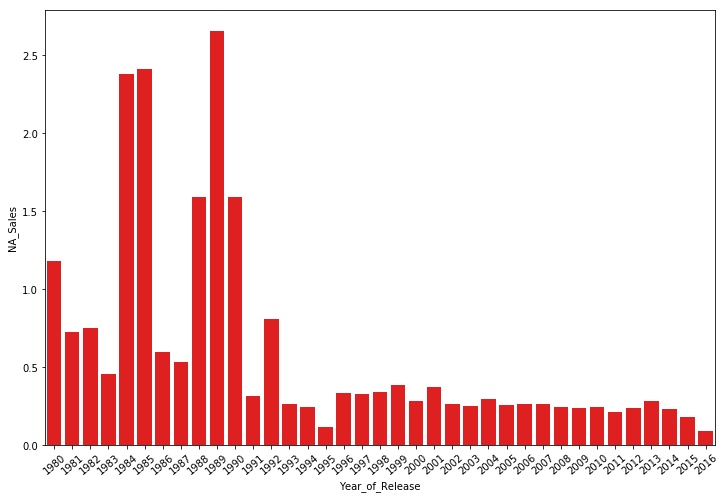

In [14]:
# Resizing the output window a larger size
plt.rcParams['figure.figsize'] = [12, 8]

NA_df = yrofrel_df.groupby("Year_of_Release", as_index=False)["NA_Sales"].agg("mean").sort_values(by=["NA_Sales"], ascending=False)
g1 = sns.barplot(x="Year_of_Release", y="NA_Sales", data=NA_df, color = "red")
lables1 = g1.get_xticklabels()
g1.set_xticklabels(lables1, rotation=40)

NA_df.head()

<b>The most year with the most videogames sold (measured in number of copies sold) in North America is 1989 with 2.655882 million copies</b>

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,Year_of_Release,EU_Sales
9,1989,0.496471
10,1990,0.476875
8,1988,0.439333
5,1985,0.338571
12,1992,0.278810


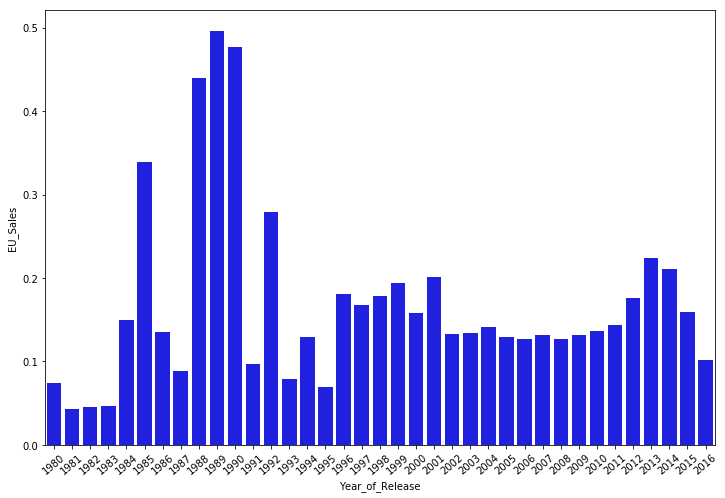

In [15]:
EU_df = yrofrel_df.groupby("Year_of_Release", as_index=False)["EU_Sales"].agg("mean").sort_values(by=["EU_Sales"], ascending=False)
g2 = sns.barplot(x="Year_of_Release", y="EU_Sales", data=EU_df, color = "blue")
lables2 = g2.get_xticklabels()
g2.set_xticklabels(lables2, rotation=40)

EU_df.head()

<b>The most year with the most videogames sold (measured in number of copies sold) in Europe is 1989 with 0.496471 million copies</b>

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,Year_of_Release,JP_Sales
9,1989,1.080000
8,1988,1.050667
5,1985,1.040000
4,1984,1.019286
6,1986,0.943333


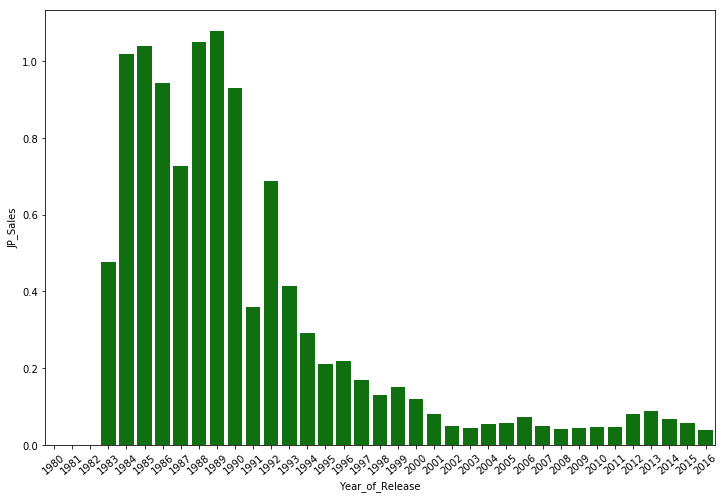

In [16]:
JP_df = yrofrel_df.groupby("Year_of_Release", as_index=False)["JP_Sales"].agg("mean").sort_values(by="JP_Sales", ascending=False)
g3= sns.barplot(x="Year_of_Release", y="JP_Sales", data=JP_df, color = "green")
lables3 = g3.get_xticklabels()
g3.set_xticklabels(lables3, rotation=40)

JP_df.head()

<b>The most year with the most videogames sold (measured in number of copies sold) in Japan is 1989 with 1.080000 million copies</b>

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,Year_of_Release,Other_Sales
6,1986,0.091905
9,1989,0.088235
10,1990,0.087500
33,2013,0.070496
8,1988,0.066000


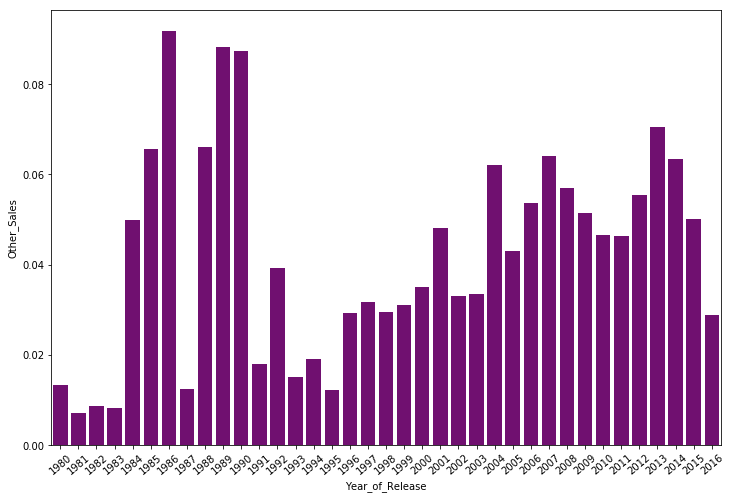

In [17]:
Other_df = yrofrel_df.groupby("Year_of_Release", as_index=False)["Other_Sales"].agg("mean").sort_values(by="Other_Sales", ascending=False)
g4 = sns.barplot(x="Year_of_Release", y="Other_Sales", data=Other_df, color = "purple")
lables4 = g4.get_xticklabels()
g4.set_xticklabels(lables4, rotation=40)

Other_df.head()

<b>The most year with the most videogames sold (measured in number of copies sold) in Other Counties is 1986 with 0.091905 million copies</b>

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,Year_of_Release,Global_Sales
9,1989,4.320588
5,1985,3.852857
4,1984,3.597143
8,1988,3.148000
10,1990,3.086875


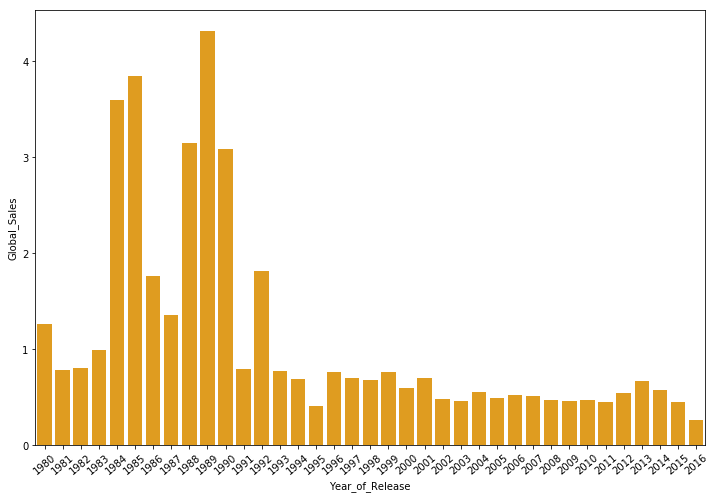

In [18]:
Global_df = yrofrel_df.groupby("Year_of_Release", as_index=False)["Global_Sales"].agg("mean").sort_values(by="Global_Sales", ascending=False)
g5 = sns.barplot(x="Year_of_Release", y="Global_Sales", data=Global_df, color = "orange")
lables5 = g5.get_xticklabels()
g5.set_xticklabels(lables5, rotation=40)

Global_df.head()

<b>The most year with the most videogames sold (measured in number of copies sold) in Other Counties is 1989 with 4.320588 million copies</b>

# #3 Does the rating of a game affect the sales in each country? 



In [19]:
from scipy import stats

In [20]:
video_df_clean.groupby("Rating").count()
# From the count, we need to remove a few ratings since the data contained has an `n` too low.

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
Rating,,,,,,,,,,,,,,,
AO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
E,3988,3988,3988,3988,3986,3988,3988,3988,3988,3988,2805,2805,2372,2372,3988
E10+,1420,1420,1420,1420,1418,1420,1420,1420,1420,1420,1118,1118,1043,1043,1420
EC,8,8,8,8,8,8,8,8,8,8,0,0,1,1,8
K-A,3,3,3,3,3,3,3,3,3,3,1,1,3,3,3
M,1562,1562,1562,1562,1561,1562,1562,1562,1562,1562,1482,1482,1517,1517,1562
RP,3,3,3,3,3,3,3,3,3,3,3,3,2,2,3
T,2951,2951,2951,2951,2949,2951,2951,2951,2951,2951,2630,2630,2551,2551,2951


In [21]:
rating_df = video_df_clean[(video_df_clean["Rating"] != "AO") & \
                       (video_df_clean["Rating"] != "RP") & \
                       (video_df_clean["Rating"] != "EC") & \
                       (video_df_clean["Rating"] != "K-A")]

In [22]:
E_df = video_df[video_df['Rating'] == 'E']
M_df = video_df[video_df['Rating'] == 'M']
T_df = video_df[video_df['Rating'] == 'T']
E10p_df = video_df[video_df['Rating'] == 'E10+']

#ANOVA 
#Ho: The ESRB rating does not affect the unit sales of the game
#Ha: The ESRB rating does affect the unit sales of the game

# North America

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


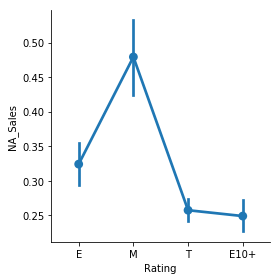

In [23]:
NA_rating_dist = sns.factorplot(data=rating_df, x='Rating', y='NA_Sales')

In [24]:
stats.f_oneway(E_df.NA_Sales.dropna(),M_df.NA_Sales.dropna(),T_df.NA_Sales.dropna(), E10p_df.NA_Sales.dropna())

F_onewayResult(statistic=29.199406533188149, pvalue=8.6671956370738182e-19)

<b> Reject the Ho </b>

# Japan

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


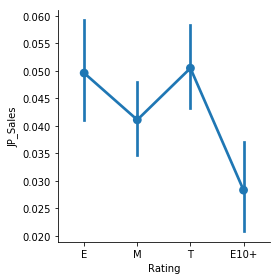

In [25]:
JP_rating_dist = sns.factorplot(data=rating_df, x='Rating', y='JP_Sales')

In [26]:
stats.f_oneway(E_df.JP_Sales.dropna(),M_df.JP_Sales.dropna(),T_df.JP_Sales.dropna(), E10p_df.JP_Sales.dropna())

F_onewayResult(statistic=3.526220727248639, pvalue=0.014270083344292479)

 <b> Accept the Ho at an alpha of 0.01 </b>

# European Union

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


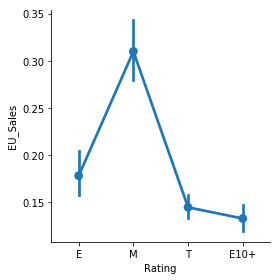

In [27]:
EU_rating_dist = sns.factorplot(data=rating_df, x='Rating', y='EU_Sales')

In [28]:
stats.f_oneway(E_df.EU_Sales.dropna(),M_df.EU_Sales.dropna(),T_df.EU_Sales.dropna(), E10p_df.EU_Sales.dropna())

F_onewayResult(statistic=32.82637383119841, pvalue=4.1851266757818734e-21)

<b> Reject the Ho </b>

# Other

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


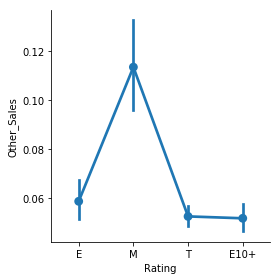

In [29]:
Other_rating_dist = sns.factorplot(data=rating_df, x='Rating', y='Other_Sales')

In [30]:
stats.f_oneway(E_df.Other_Sales.dropna(),M_df.Other_Sales.dropna(),T_df.Other_Sales.dropna(), E10p_df.Other_Sales.dropna())

F_onewayResult(statistic=29.131532325597732, pvalue=9.5767635953061897e-19)

<b>Reject the Ho.</b>

# Global

/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


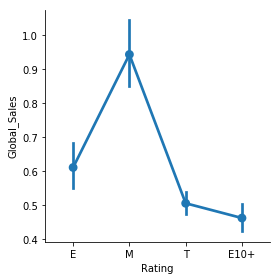

In [31]:
Global_rating_dist = sns.factorplot(data=rating_df, x='Rating', y='Global_Sales')

In [32]:
stats.f_oneway(E_df.Global_Sales.dropna(),M_df.Global_Sales.dropna(),T_df.Global_Sales.dropna(), E10p_df.Global_Sales.dropna())

F_onewayResult(statistic=28.847932907547825, pvalue=1.4531309863507949e-18)

<b>Reject the Ho</b>

# #4 What is the most popular gaming platform for critically acclaimed games? User rated games?


## Creating a dataframe of the Critic Score

In [33]:
no_4_critic = video_df_clean.groupby("Platform", as_index=False)["Critic_Score"].agg("mean").dropna().sort_values(by=["Critic_Score"], ascending=False)
no_4_critic.head()

,Platform,Critic_Score
10,PC,75.928671
23,XOne,73.325444
14,PS4,72.091270
11,PS,71.515000
16,PSV,70.791667


## Creating a dataframe of the Critic Score

## Creating the User Score Dataframe

In [34]:
no_4_user_sort = video_df_clean.groupby("Platform", as_index=False)["User_Score"].agg("mean").dropna().sort_values(by=["User_Score"], ascending=False)
no_4_user = video_df_clean.groupby("Platform", as_index=False)["User_Score"].agg("mean").dropna()
no_4_user_sort.head()

,Platform,User_Score
11,PS,78.654321
4,GBA,76.768627
12,PS2,76.268332
5,GC,75.975410
22,XB,75.005119


In [35]:
no_4_merge =no_4_user.merge(no_4_critic, on='Platform')
no_4_merge.head()

,Platform,User_Score,Critic_Score
0,3DS,68.316092,67.101190
1,DS,70.251938,63.761506
2,GBA,76.768627,67.372146
3,GC,75.975410,69.488839
4,PC,70.624675,75.928671


In [36]:
no_4_merge_melt = pd.melt(no_4_merge, id_vars='Platform', var_name='ScoreSource', value_name='Value')
no_4_merge_melt.head()

,Platform,ScoreSource,Value
0,3DS,User_Score,68.316092
1,DS,User_Score,70.251938
2,GBA,User_Score,76.768627
3,GC,User_Score,75.975410
4,PC,User_Score,70.624675


/Users/Chris/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


[(60, 85)]

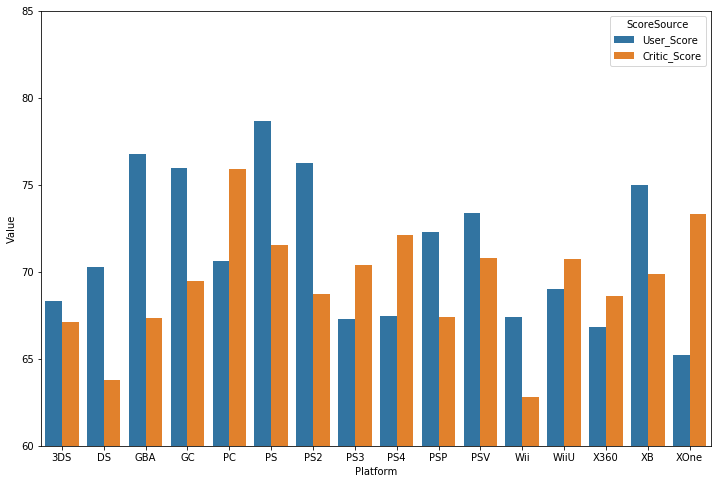

In [37]:
fi = sns.barplot(x="Platform", y="Value", data=no_4_merge_melt, hue = "ScoreSource")
fi.set(ylim=(60, 85))

## A glance into the PC data frame

In [38]:
pc_critic_score_df = video_df_clean[video_df_clean["Platform"] == "PC"]
pc_critic_score_df.sort_values(by="Critic_Score", ascending=False).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1730,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,79.0,3756.0,Rockstar North,M
4710,BioShock,PC,2007,Shooter,Take-Two Interactive,0.01,0.39,0.00,0.02,0.41,96.0,44.0,85.0,3606.0,"Irrational Games, 2K Marin",M
284,Half-Life,PC,1997,Shooter,Vivendi Games,4.03,0.00,0.09,0.00,4.12,96.0,24.0,91.0,3161.0,Valve Software,M
665,Half-Life 2,PC,2004,Shooter,Vivendi Games,2.28,0.02,0.08,0.00,2.37,96.0,81.0,91.0,8665.0,Valve Software,M
9143,The Orange Box,PC,2007,Shooter,Electronic Arts,0.00,0.11,0.00,0.03,0.14,96.0,34.0,93.0,1495.0,Valve Software,M
2703,Portal 2,PC,2011,Shooter,Valve Software,0.33,0.32,0.00,0.10,0.76,95.0,52.0,88.0,5999.0,Valve Software,E10+
1160,Diablo,PC,1996,Role-Playing,Activision,0.01,1.58,0.00,0.00,1.59,94.0,12.0,87.0,850.0,Blizzard Entertainment,M
3067,BioShock Infinite,PC,2013,Shooter,Take-Two Interactive,0.29,0.30,0.00,0.07,0.66,94.0,68.0,85.0,7322.0,Irrational Games,M
8465,Sid Meier's Civilization IV,PC,2005,Strategy,Take-Two Interactive,0.02,0.12,0.00,0.03,0.16,94.0,50.0,83.0,909.0,Firaxis Games,E10+
13876,Grand Theft Auto: Vice City,PC,2003,Action,Take-Two Interactive,0.00,0.03,0.00,0.01,0.04,94.0,30.0,88.0,1520.0,Rockstar North,M


## A glance into the PS data frame

In [39]:
ps_user_score_df = video_df_clean[video_df_clean["Platform"] == "PS"]
ps_user_score_df.sort_values(by="User_Score", ascending=False).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1546,Castlevania: Symphony of the Night,PS,1997,Platform,Konami Digital Entertainment,0.58,0.40,0.21,0.08,1.27,93.0,12.0,94.0,358.0,Konami,T
146,Metal Gear Solid,PS,1998,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03,94.0,20.0,94.0,918.0,KCEJ,M
5585,Harvest Moon: Back to Nature,PS,1999,Simulation,Ubisoft,0.11,0.07,0.12,0.02,0.32,82.0,6.0,93.0,78.0,Victor Interactive Software,E
822,R4: Ridge Racer Type 4,PS,1998,Racing,Namco Bandai Games,0.68,0.46,0.79,0.13,2.06,88.0,18.0,92.0,21.0,Namco,NaN
65,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,92.0,20.0,92.0,1282.0,SquareSoft,T
151,Resident Evil 2,PS,1998,Action,Virgin Interactive,1.88,1.47,2.02,0.45,5.82,89.0,13.0,92.0,364.0,Capcom,M
1156,Silent Hill,PS,1999,Action,Konami Digital Entertainment,0.71,0.48,0.30,0.10,1.60,86.0,17.0,92.0,326.0,KCET,M
205,Tony Hawk's Pro Skater,PS,1999,Sports,Activision,3.42,1.38,0.02,0.20,5.02,92.0,18.0,92.0,69.0,Neversoft Entertainment,T
2083,Oddworld: Abe's Exoddus,PS,1998,Platform,GT Interactive,0.55,0.38,0.00,0.06,0.99,88.0,13.0,91.0,69.0,Oddworld Inhabitants,T
106,Tekken 3,PS,1998,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,91.0,367.0,Namco,T


# #5 Just curious, what is the most sold genre (measured by number of copies sold) by each region avalible in the dataset?

In [40]:
video_df_clean["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [41]:
NA_genre_df = video_df_clean.groupby("Genre", as_index=False)["NA_Sales"].agg("sum").dropna().sort_values(by=["NA_Sales"], ascending=False)
JP_genre_df = video_df_clean.groupby("Genre", as_index=False)["JP_Sales"].agg("sum").dropna().sort_values(by=["JP_Sales"], ascending=False)
EU_genre_df = video_df_clean.groupby("Genre", as_index=False)["EU_Sales"].agg("sum").dropna().sort_values(by=["EU_Sales"], ascending=False)
Other_genre_df = video_df_clean.groupby("Genre", as_index=False)["Other_Sales"].agg("sum").dropna().sort_values(by=["Other_Sales"], ascending=False)
Global_genre_df = video_df_clean.groupby("Genre", as_index=False)["Global_Sales"].agg("sum").dropna().sort_values(by=["Global_Sales"], ascending=False)

In [42]:
full_genre_df = NA_genre_df.merge(JP_genre_df, on='Genre')
full_genre_df = full_genre_df.merge(EU_genre_df, on='Genre')
full_genre_df = full_genre_df.merge(Other_genre_df, on='Genre')
full_genre_df = full_genre_df.merge(Global_genre_df, on='Genre')

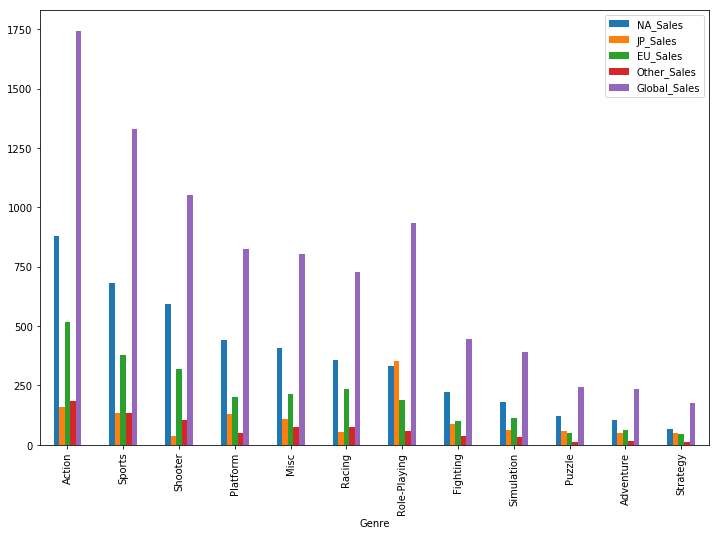

In [43]:
full_genre_df.head()
full_genre_df.plot(kind="bar", x="Genre")


NA: Action
Japan: Role-Playing
EU: Action
Other: Action
Global: Action